In [206]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick
import sys
from datetime import datetime as dt

In [207]:
# Read in files from the current working directory.
total = pd.read_excel('Total.xlsx')
activity = pd.read_csv('Activity.csv')
age = pd.read_csv('age.csv')
deprivation = pd.read_csv('deprivation.csv')
finance = pd.read_excel('Finance.xlsx')
gender = pd.read_csv('gender.csv')

In [208]:
import os

# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

C:\Users\ciaraw\OneDrive - Sport England\Moving Communities


In [209]:
total.head()

,Year,Month,TotalThroughput,UniquePeople,TotalSocialValue
0,2019,Apr,12799130,3008313,59074334
1,2019,May,12914245,2980714,59936436
2,2019,Jun,12950299,3069902,61973690
3,2019,Jul,13546090,3143102,63163812
4,2019,Aug,13065063,3145852,59493530


In [210]:
activity.head()

,Year,Month,Fitness (Gym) activities,Group Workout,Swimming - lessons,Swimming activities,Sports Hall activities,Outdoor activities,Other
0,2019,Apr,"3,501,118","1,376,630","1,945,830","2,463,579","550,293","278,342","2,683,338"
1,2019,May,"3,532,233","1,355,163","2,094,069","2,386,767","532,010","268,164","2,745,839"
2,2019,Jun,"3,370,708","1,276,326","2,048,298","2,196,094","526,491","250,870","3,281,512"
3,2019,Jul,"3,633,663","1,351,251","2,102,386","2,783,498","542,687","289,981","2,842,624"
4,2019,Aug,"3,275,685","1,153,948","1,957,080","3,085,344","462,016","267,405","2,863,585"


In [211]:
age.head()

,Year,Month,1-15,16-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
0,2019,Apr,"1,031,397","278,942","421,977","403,524","349,697","257,406","198,122","60,501","6,747"
1,2019,May,"1,026,587","264,336","417,020","401,166","348,437","258,115","197,421","60,741","6,889"
2,2019,Jun,"1,040,531","287,582","428,455","414,493","359,130","265,317","203,332","63,903","7,160"
3,2019,Jul,"1,099,738","294,455","432,242","416,486","354,106","267,578","206,724","64,636","7,137"
4,2019,Aug,"1,153,922","278,809","426,541","404,292","342,825","265,643","203,251","63,552","7,018"


In [212]:
deprivation.head()

,Year,Month,1-3,4-7,8-10
0,2019,Apr,"793,630","1,200,002","1,014,681"
1,2019,May,"772,105","1,198,422","1,010,187"
2,2019,Jun,"806,556","1,229,570","1,033,776"
3,2019,Jul,"852,644","1,249,959","1,040,498"
4,2019,Aug,"853,085","1,248,698","1,044,069"


In [213]:
finance.head()

,Year,Month,Facility Type,Total Expenditure,Total Utilities Expenditure
0,2019,Apr,Large Wet and Dry,24846059,2390754
1,2019,Apr,Large Dry,3216395,194603
2,2019,Apr,Small Wet and Dry,9645486,1061668
3,2019,Apr,Wet Only,519572,79243
4,2019,Apr,Small Dry,1467715,92420


In [214]:
gender.head()

,Year,Month,Male,Female
0,2019,Apr,"1,619,505","1,388,807"
1,2019,May,"1,612,396","1,368,318"
2,2019,Jun,"1,644,865","1,425,036"
3,2019,Jul,"1,683,158","1,459,944"
4,2019,Aug,"1,679,134","1,466,719"


In [215]:
# Convert year to string format
total["Year"] = total["Year"].astype(str)
activity["Year"] = activity["Year"].astype(str)
age["Year"] = age["Year"].astype(str)
deprivation["Year"] = deprivation["Year"].astype(str)
finance["Year"] = finance["Year"].astype(str)
gender["Year"] = gender["Year"].astype(str)

# Join two columns together
total['Date'] = total['Month'] + ' ' + total['Year']
finance['Date'] = finance['Month'] + ' ' + finance['Year']

# Convert to datetime
total['Date'] = pd.to_datetime(total['Date'])
finance['Date'] = pd.to_datetime(finance['Date'])

In [216]:
total['TotalThroughputInMills'] = round(total['TotalThroughput']/1000000,1)
total['UniquePeopleInMills'] = round(total['UniquePeople']/1000000,1)
total['TotalSocialValueInMills'] = round(total['TotalSocialValue']/1000000,1)

In [217]:
# Set the figure size.
sns.set(rc={'figure.figsize':(15, 8)})

# Set the tick style.
sns.set_style('ticks')

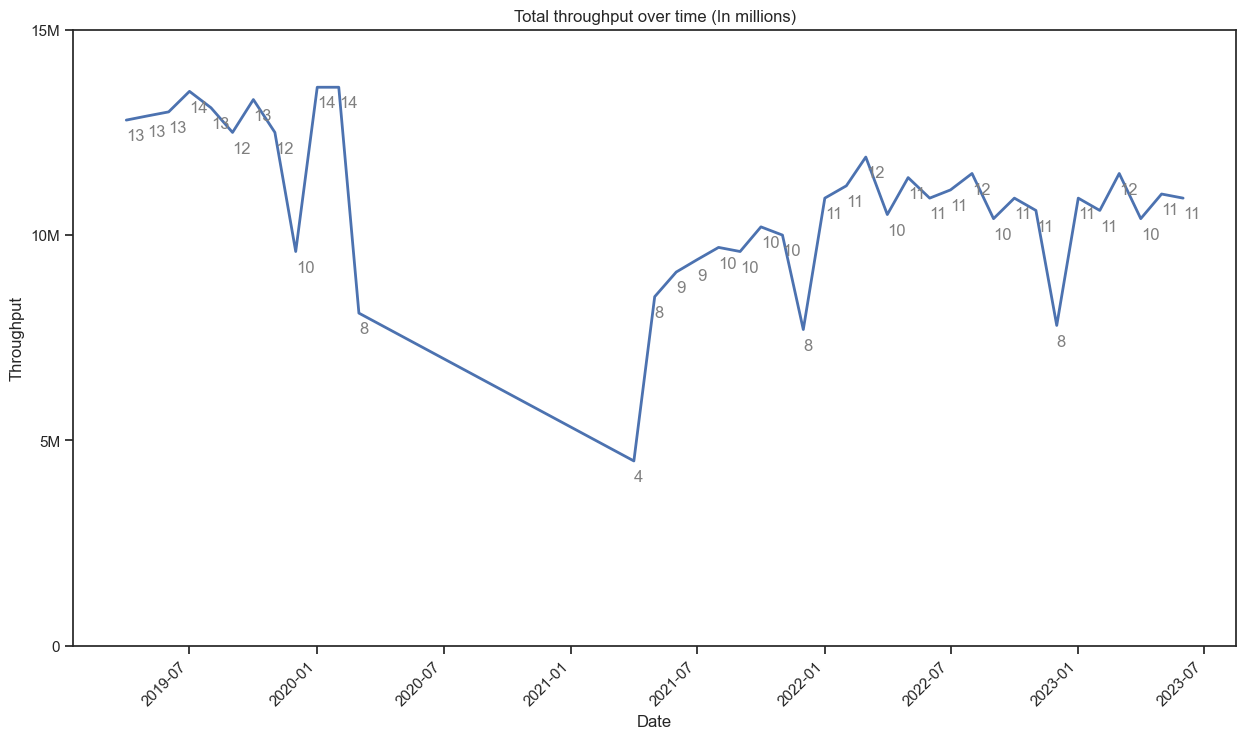

In [218]:
# Total throughput over time
ax = sns.lineplot(x='Date', 
             y='TotalThroughputInMills', 
              linewidth=2,
              data=total).set_title("Total throughput over time (In millions)")

    # label points on the plot
for x, y in zip(total['Date'], total['TotalThroughputInMills']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y-0.5, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'grey') # set colour of line
    
plt.xlabel("Date")
plt.ylabel("Throughput")
ytick_labels = [0, '5M', '10M', '15M']
ytick_positions = [0, 5, 10, 15]
plt.yticks(ytick_positions, ytick_labels)
plt.xticks(rotation=45, ha='right')
plt.show()

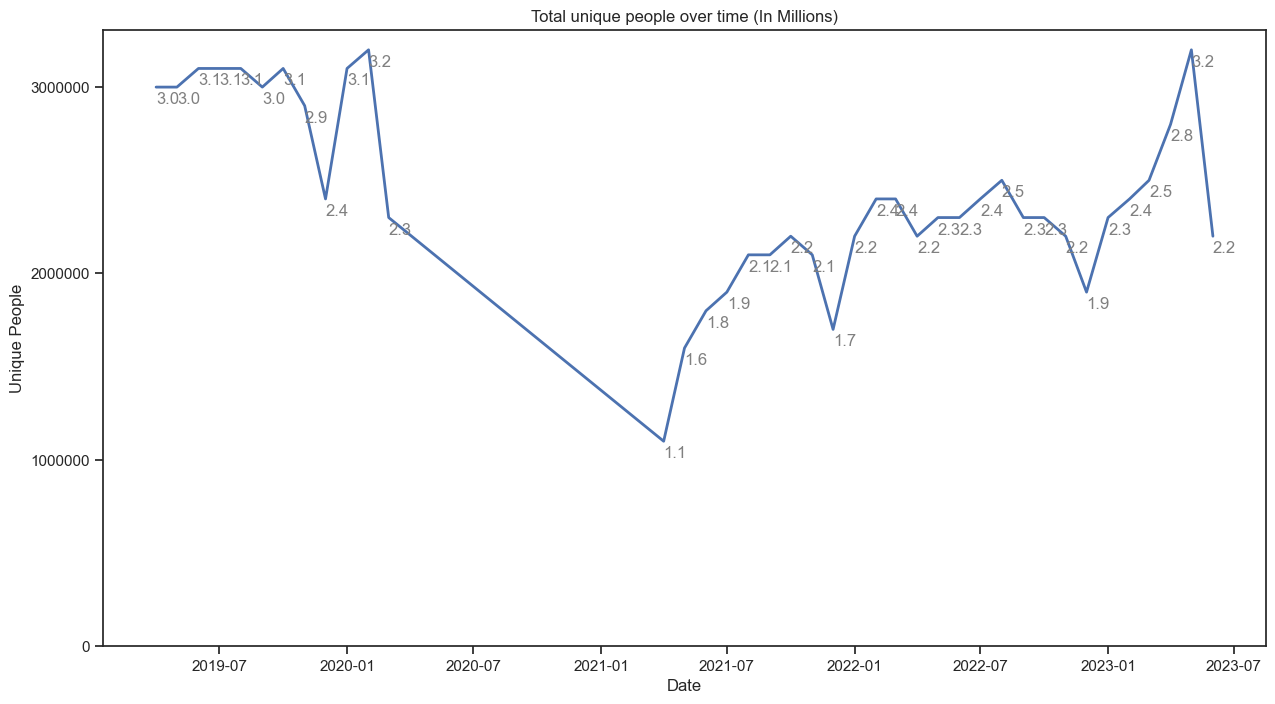

In [219]:
# Total Unique people over time
ax = sns.lineplot(x='Date', 
             y='UniquePeopleInMills', 
              linewidth=2,
              data=total).set_title("Total unique people over time (In Millions)")

    # label points on the plot
for x, y in zip(total['Date'], total['UniquePeopleInMills']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y-0.09, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.1f}'.format(y), # data label, formatted to ignore decimals
     color = 'grey') # set colour of line


plt.xlabel("Date")
plt.ylabel("Unique People")
ytick_labels = [0, 1000000, 2000000, 3000000]
ytick_positions = [0, 1, 2, 3]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

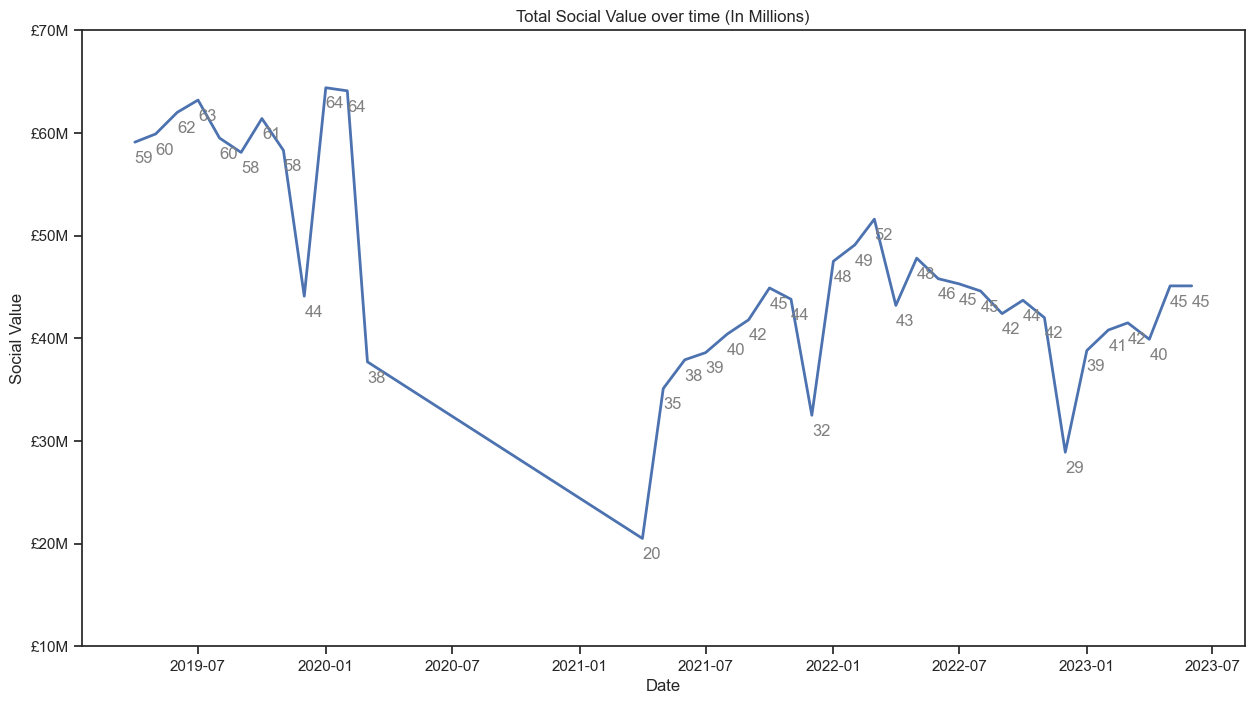

In [220]:
# Total social value over time
ax = sns.lineplot(x='Date', 
             y='TotalSocialValueInMills', 
              linewidth=2,
              data=total).set_title("Total Social Value over time (In Millions)")    

    # label points on the plot
for x, y in zip(total['Date'], total['TotalSocialValueInMills']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y-2, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'grey') # set colour of line

plt.xlabel("Date")
plt.ylabel("Social Value")
ytick_labels = ['£10M', '£20M', '£30M', '£40M', '£50M', '£60M', '£70M']
ytick_positions = [10, 20, 30, 40, 50 ,60, 70]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

In [221]:
total['month2'] = total['Date'].dt.month
total['year'] = total['Date'].dt.year

In [222]:
# Groupby month
total2 = round(total.groupby(total['Month']).mean(),0).reset_index()

# drop unnecessary year column
total2 = total2.drop('year', axis=1)
total2

,Month,TotalThroughput,UniquePeople,TotalSocialValue,TotalThroughputInMills,UniquePeopleInMills,TotalSocialValueInMills,month2
0,Apr,9552536.0,2292966.0,40658650.0,10.0,2.0,41.0,4.0
1,Aug,11426709.0,2612260.0,48179462.0,11.0,3.0,48.0,8.0
2,Dec,8363513.0,1994686.0,35171184.0,8.0,2.0,35.0,12.0
3,Feb,11796656.0,2676205.0,51354301.0,12.0,3.0,51.0,2.0
4,Jan,11808061.0,2550934.0,50222430.0,12.0,3.0,50.0,1.0
5,Jul,11353008.0,2482752.0,49043886.0,11.0,2.0,49.0,7.0
6,Jun,10948977.0,2330136.0,47684440.0,11.0,2.0,48.0,6.0
7,Mar,10508602.0,2386774.0,43578923.0,10.0,2.0,44.0,3.0
8,May,10939023.0,2513776.0,46964476.0,11.0,3.0,47.0,5.0
9,Nov,11052470.0,2397823.0,48026937.0,11.0,2.0,48.0,11.0


Text(0, 0.5, 'Average throughput in millions')

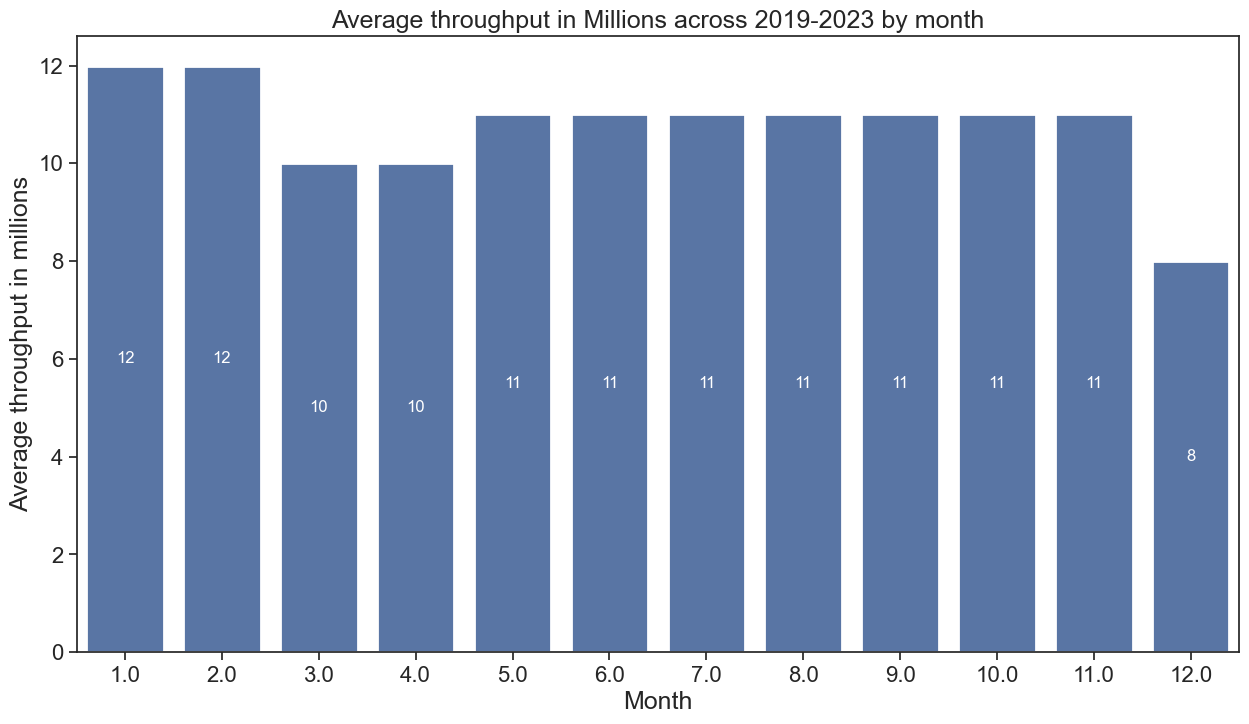

In [223]:
# Average throughput by month
ax = sns.barplot(y='TotalThroughputInMills', 
             x='month2', linewidth=2, color='b',
            data=total2)
plt.title('Average throughput in Millions across 2019-2023 by month')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='w', fontsize=12)
plt.xlabel("Month")
plt.ylabel("Average throughput in millions")

In [224]:
total.head()

,Year,Month,TotalThroughput,UniquePeople,TotalSocialValue,Date,TotalThroughputInMills,UniquePeopleInMills,TotalSocialValueInMills,month2,year
0,2019,Apr,12799130,3008313,59074334,2019-04-01,12.8,3.0,59.1,4,2019
1,2019,May,12914245,2980714,59936436,2019-05-01,12.9,3.0,59.9,5,2019
2,2019,Jun,12950299,3069902,61973690,2019-06-01,13.0,3.1,62.0,6,2019
3,2019,Jul,13546090,3143102,63163812,2019-07-01,13.5,3.1,63.2,7,2019
4,2019,Aug,13065063,3145852,59493530,2019-08-01,13.1,3.1,59.5,8,2019


Text(0, 0.5, 'Total throughput in millions')

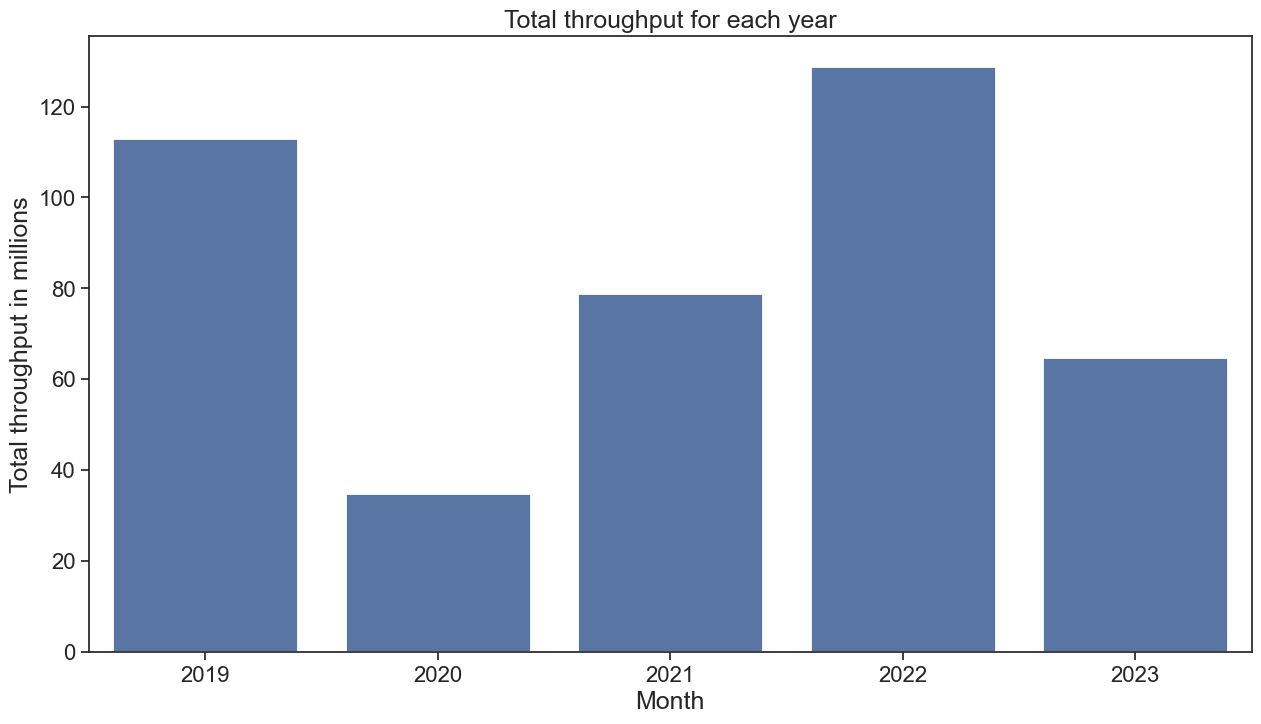

In [225]:
# Groupby month
total3 = round(total.groupby(total['year']).sum(),0).reset_index()

# Average throughput by month
ax = sns.barplot(y='TotalThroughputInMills', 
             x='year', linewidth=2, color='b',
            data=total3)
plt.title('Total throughput for each year')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.xlabel("Month")
plt.ylabel("Total throughput in millions")

In [226]:
print(age.dtypes)

Year     object
Month    object
1-15     object
16-24    object
25-34    object
35-44    object
45-54    object
55-64    object
65-74    object
75-84    object
85+      object
dtype: object


In [227]:
age = age.replace(',', '', regex=True)
deprivation = deprivation.replace(',', '', regex=True)
activity = activity.replace(',', '', regex=True)
finance = finance.replace(',', '', regex=True)
gender = gender.replace(',', '', regex=True)

In [228]:
# Convert to string format
age["1-15"] = age["1-15"].astype(float)
age["16-24"] = age["16-24"].astype(float)
age["25-34"] = age["25-34"].astype(float)
age["35-44"] = age["35-44"].astype(float)
age["45-54"] = age["45-54"].astype(float)
age["55-64"] = age["55-64"].astype(float)
age["65-74"] = age["65-74"].astype(float)
age["75-84"] = age["75-84"].astype(float)
age["85+"] = age["85+"].astype(float)
deprivation["1-3"] = deprivation["1-3"].astype(float)
deprivation["4-7"] = deprivation["4-7"].astype(float)
deprivation["8-10"] = deprivation["8-10"].astype(float)
activity["Fitness (Gym) activities"] = activity["Fitness (Gym) activities"].astype(float)
activity["Group Workout"] = activity["Group Workout"].astype(float)
activity["Swimming - lessons"] = activity["Swimming - lessons"].astype(float)
activity["Swimming activities"] = activity["Swimming activities"].astype(float)
activity["Sports Hall activities"] = activity["Sports Hall activities"].astype(float)
activity["Outdoor activities"] = activity["Outdoor activities"].astype(float)
activity["Other"] = activity["Other"].astype(float)
finance['Total Expenditure'] = finance['Total Expenditure'].astype(float)
gender['Male'] = gender['Male'].astype(float)
gender['Female'] = gender['Female'].astype(float)

In [229]:
gender.dtypes

Year       object
Month      object
Male      float64
Female    float64
dtype: object

In [230]:
age2 = age.copy()
age2['16+'] = age['16-24'] + age['25-34'] + age["35-44"] + age["45-54"] + age["55-64"] + age["65-74"] + age["75-84"] + age["85+"] 
del age2['16-24'] 
del age2['25-34'] 
del age2["35-44"] 
del age2["45-54"] 
del age2["55-64"] 
del age2["65-74"] 
del age2["75-84"] 
del age2["85+"] 
age2.head()

,Year,Month,1-15,16+
0,2019,Apr,1031397.0,1976916.0
1,2019,May,1026587.0,1954125.0
2,2019,Jun,1040531.0,2029372.0
3,2019,Jul,1099738.0,2043364.0
4,2019,Aug,1153922.0,1991931.0


In [231]:
age['16-34'] = age['16-24'] + age['25-34']
age['35-54'] = age["35-44"] + age["45-54"]
age['55-74'] = age["55-64"] + age["65-74"]
age['75+'] = age["75-84"] + age["85+"]
del age['16-24'] 
del age['25-34'] 
del age["35-44"] 
del age["45-54"] 
del age["55-64"] 
del age["65-74"] 
del age["75-84"] 
del age["85+"] 
age.head()

,Year,Month,1-15,16-34,35-54,55-74,75+
0,2019,Apr,1031397.0,700919.0,753221.0,455528.0,67248.0
1,2019,May,1026587.0,681356.0,749603.0,455536.0,67630.0
2,2019,Jun,1040531.0,716037.0,773623.0,468649.0,71063.0
3,2019,Jul,1099738.0,726697.0,770592.0,474302.0,71773.0
4,2019,Aug,1153922.0,705350.0,747117.0,468894.0,70570.0


In [232]:
age = pd.melt(age, id_vars=['Year', 'Month'])
age['Date'] = age['Month'] + ' ' + age['Year']
age['Date'] = pd.to_datetime(age['Date'])

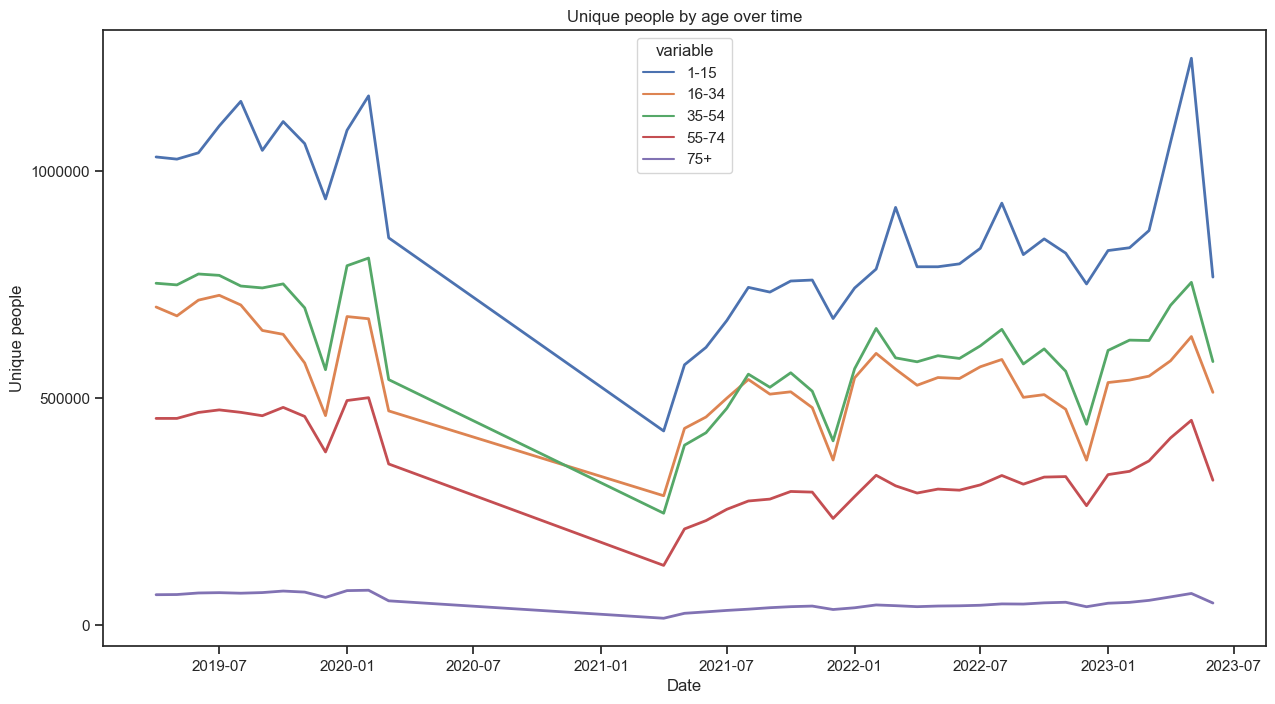

In [233]:
# Total throughput over time
ax = sns.lineplot(x='Date', 
             y='value', hue='variable' ,
              linewidth=2,
              data=age).set_title("Unique people by age over time")
               

plt.xlabel("Date")
plt.ylabel("Unique people")
ytick_labels = [0, 500000, 1000000]
ytick_positions = [0, 500000, 1000000]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

In [234]:
age2 = pd.melt(age2, id_vars=['Year', 'Month'])
age2['Date'] = age2['Month'] + ' ' + age2['Year']
age2['Date'] = pd.to_datetime(age2['Date'])

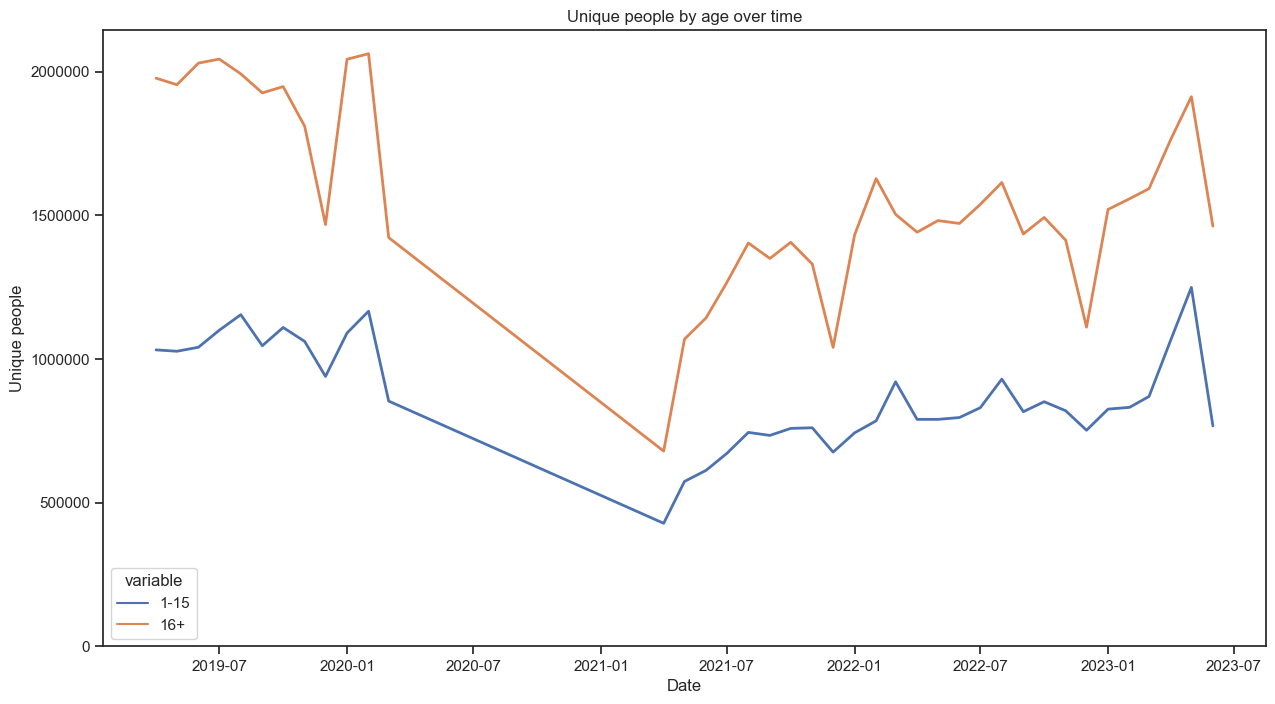

In [235]:
# Total throughput over time
ax = sns.lineplot(x='Date', 
             y='value', hue='variable' ,
              linewidth=2,
              data=age2).set_title("Unique people by age over time")
               

plt.xlabel("Date")
plt.ylabel("Unique people")
ytick_labels = [0, 500000, 1000000, 1500000, 2000000]
ytick_positions = [0, 500000, 1000000, 1500000, 2000000]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

In [236]:
deprivation = pd.melt(deprivation, id_vars=['Year', 'Month'])
deprivation['Date'] = deprivation['Month'] + ' ' + deprivation['Year']
deprivation['Date'] = pd.to_datetime(deprivation['Date'])

In [237]:
deprivation.dtypes

Year                object
Month               object
variable            object
value              float64
Date        datetime64[ns]
dtype: object

In [238]:
deprivation['avgvalue'] = np.where(deprivation['variable']=='4-7', deprivation['value']/4, deprivation['value']/3)
deprivation.head()

,Year,Month,variable,value,Date,avgvalue
0,2019,Apr,1-3,793630.0,2019-04-01,264543.333333
1,2019,May,1-3,772105.0,2019-05-01,257368.333333
2,2019,Jun,1-3,806556.0,2019-06-01,268852.000000
3,2019,Jul,1-3,852644.0,2019-07-01,284214.666667
4,2019,Aug,1-3,853085.0,2019-08-01,284361.666667


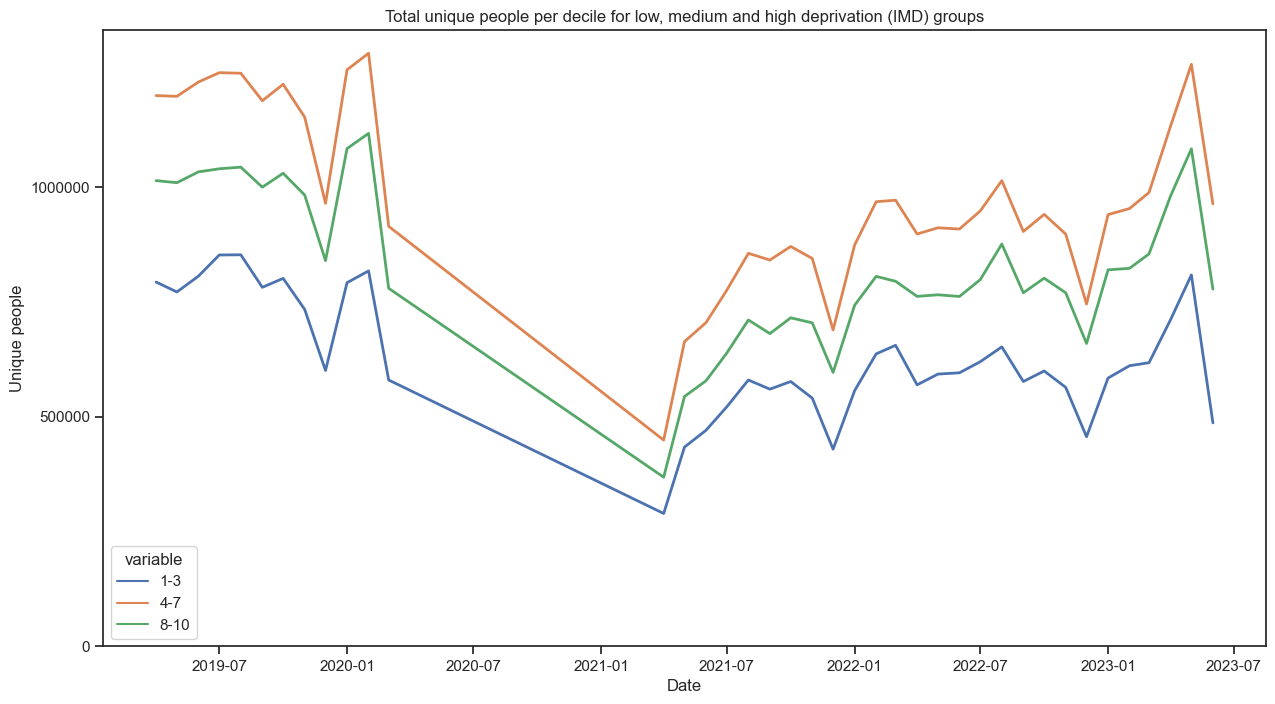

In [239]:
# Total throughput over time
ax = sns.lineplot(x='Date', 
             y='value', hue='variable' ,
              linewidth=2,
              data=deprivation).set_title("Total unique people per decile for low, medium and high deprivation (IMD) groups")

plt.xlabel("Date")
plt.ylabel("Unique people")
ytick_labels = [0, 500000, 1000000]
ytick_positions = [0, 500000, 1000000]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

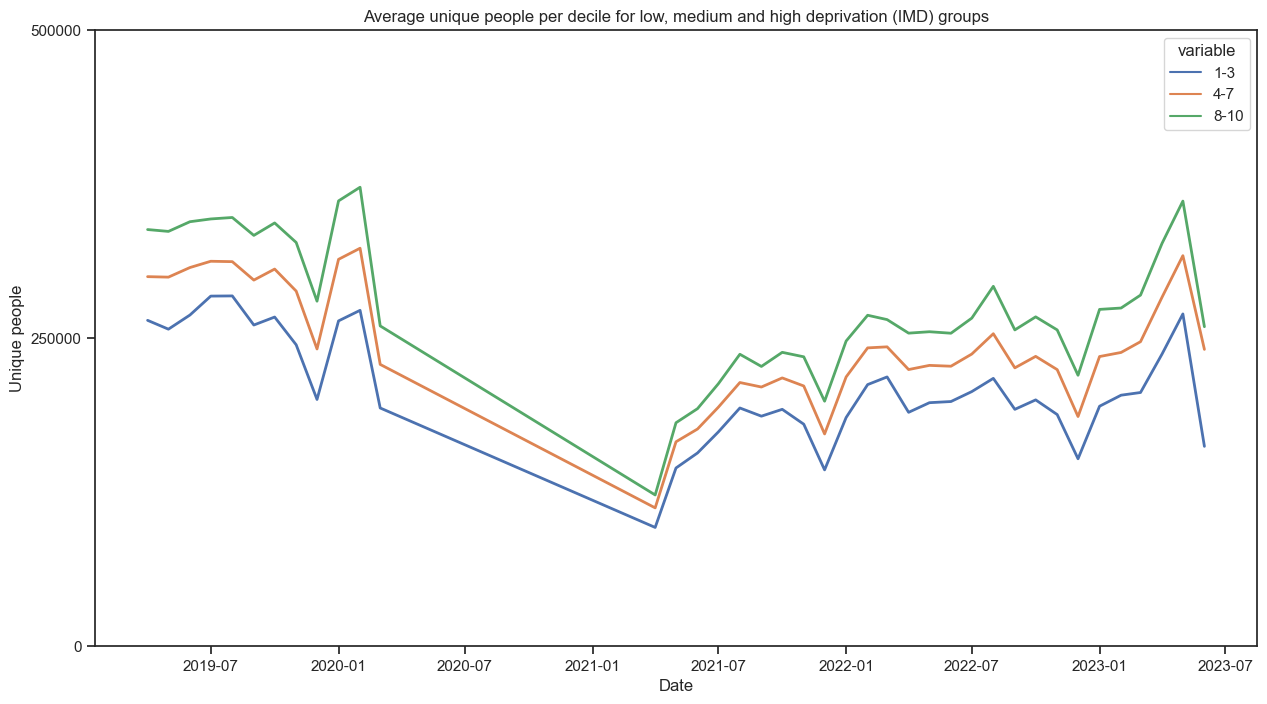

In [240]:
# Total throughput over time
ax = sns.lineplot(x='Date', 
             y='avgvalue', hue='variable' ,
              linewidth=2,
              data=deprivation).set_title("Average unique people per decile for low, medium and high deprivation (IMD) groups")

plt.xlabel("Date")
plt.ylabel("Unique people")
ytick_labels = [0, 250000, 500000]
ytick_positions = [0, 250000, 500000]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

In [241]:
activity = pd.melt(activity, id_vars=['Year', 'Month'])
activity['Date'] = activity['Month'] + ' ' + activity['Year']
activity['Date'] = pd.to_datetime(activity['Date'])

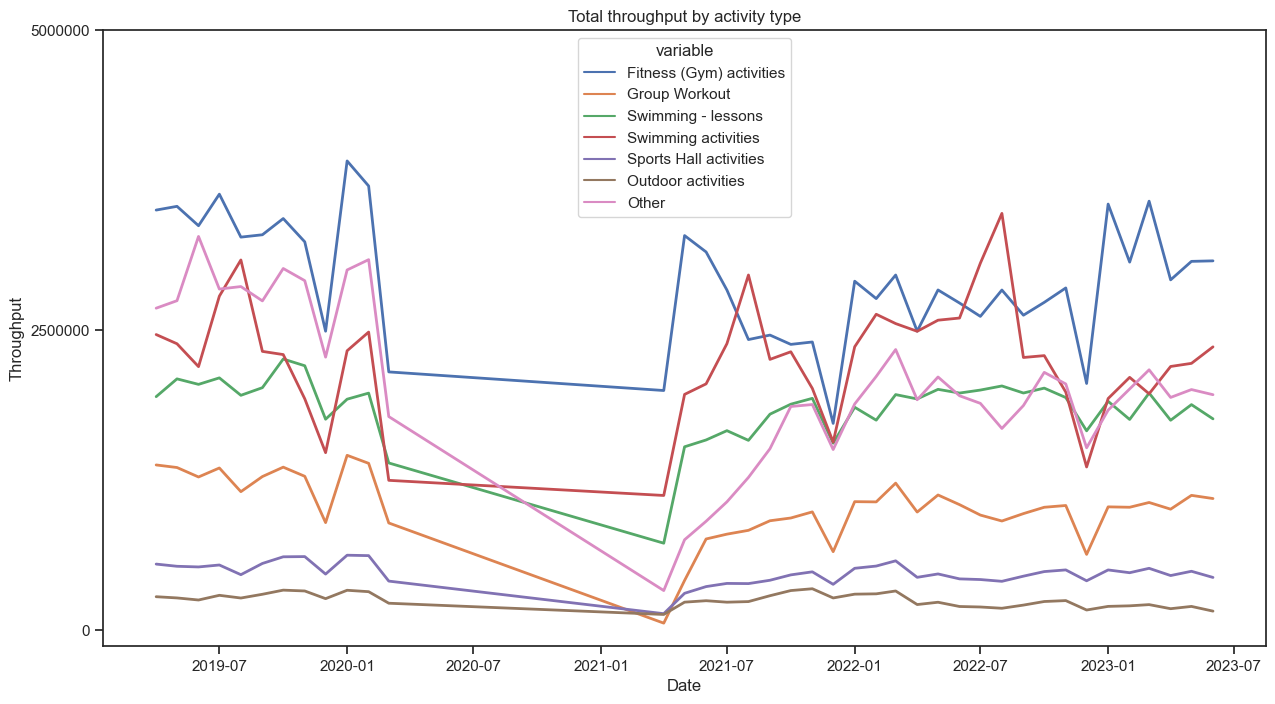

In [242]:
# Total throughput over time
ax = sns.lineplot(x='Date', 
             y='value', hue='variable' ,
              linewidth=2,
              data=activity).set_title("Total throughput by activity type")

plt.xlabel("Date")
plt.ylabel("Throughput")
ytick_labels = [0, 2500000, 5000000]
ytick_positions = [0, 2500000, 5000000]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

In [243]:
finance.describe()

,Total Expenditure,Total Utilities Expenditure
count,1.800000e+02,1.800000e+02
mean,8.062999e+06,1.184320e+06
std,9.498297e+06,1.600467e+06
min,2.837340e+05,4.400600e+04
25%,1.348536e+06,1.316755e+05
50%,3.211058e+06,3.102815e+05
75%,9.980790e+06,1.819970e+06
max,3.236282e+07,7.082806e+06


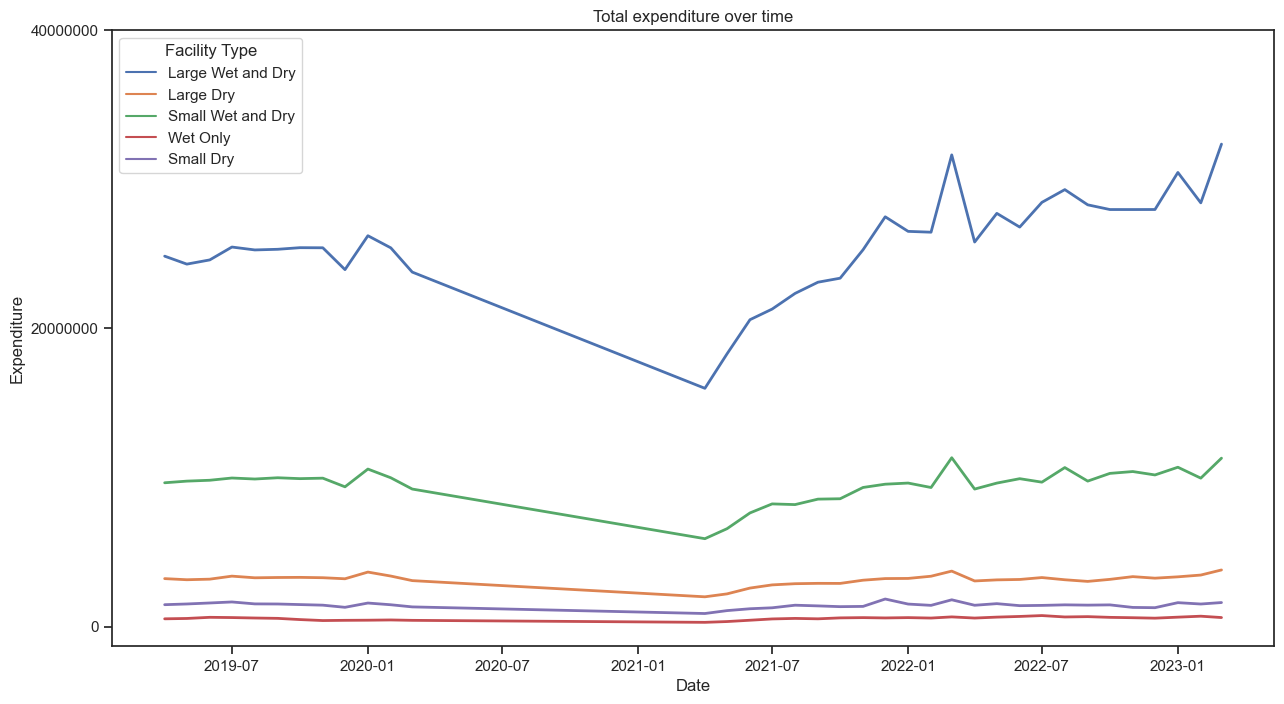

In [244]:
# Total throughput over time
ax = sns.lineplot(x='Date', 
             y='Total Expenditure' , hue='Facility Type' ,
              linewidth=2,
              data=finance).set_title("Total expenditure over time")

plt.xlabel("Date")
plt.ylabel("Expenditure")
ytick_labels = [0, 20000000, 40000000]
ytick_positions = [0, 20000000, 40000000]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

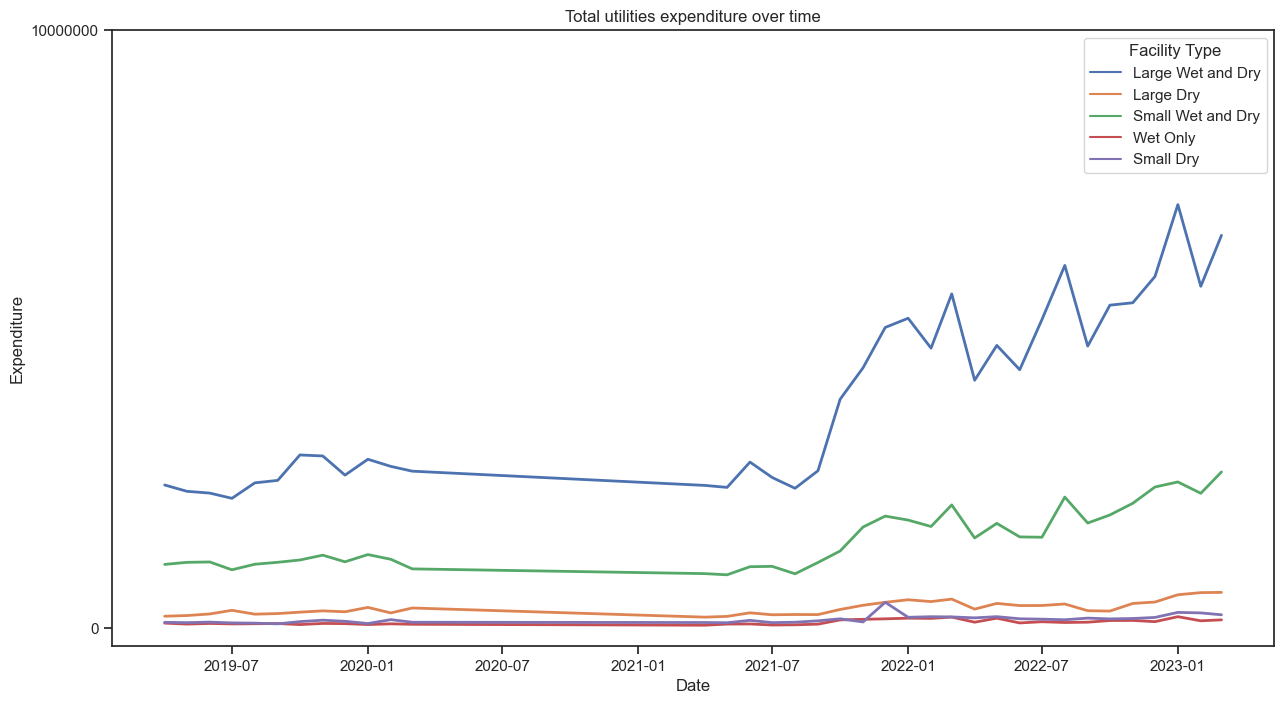

In [245]:
# Total throughput over time
ax = sns.lineplot(x='Date', 
             y='Total Utilities Expenditure' , hue='Facility Type' ,
              linewidth=2,
              data=finance).set_title("Total utilities expenditure over time")

plt.xlabel("Date")
plt.ylabel("Expenditure")
ytick_labels = [0, 10000000]
ytick_positions = [0, 10000000]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

In [246]:
gender = pd.melt(gender, id_vars=['Year', 'Month'])
gender['Date'] = gender['Month'] + ' ' + gender['Year']
gender['Date'] = pd.to_datetime(gender['Date'])

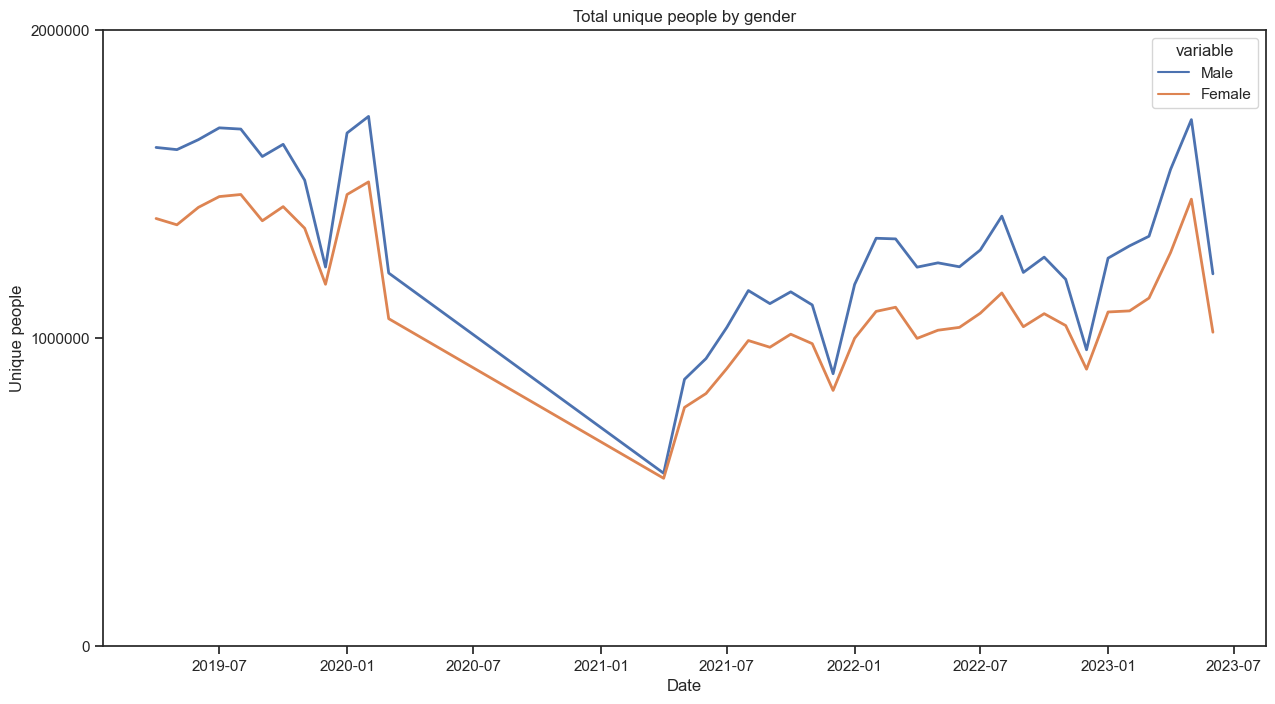

In [247]:
# Total throughput over time
ax = sns.lineplot(x='Date', 
             y='value', hue='variable' ,
              linewidth=2,
              data=gender).set_title("Total unique people by gender")

plt.xlabel("Date")
plt.ylabel("Unique people")
ytick_labels = [0, 1000000, 2000000]
ytick_positions = [0, 1000000, 2000000]
plt.yticks(ytick_positions, ytick_labels)
plt.show()

In [248]:
gender['month2'] = gender['Date'].dt.month
activity['month2'] = activity['Date'].dt.month
age['month2'] = age['Date'].dt.month
deprivation['month2'] = deprivation['Date'].dt.month
finance['month2'] = finance['Date'].dt.month

In [249]:
# Convert year to int format
total["Year2"] = total["Year"].astype(int)
activity["Year2"] = activity["Year"].astype(int)
age["Year2"] = age["Year"].astype(int)
deprivation["Year2"] = deprivation["Year"].astype(int)
finance["Year2"] = finance["Year"].astype(int)
gender["Year2"] = gender["Year"].astype(int)

In [250]:
# Function to calculate financial year
def calculate_financial_year(row):
    if row['month2'] >= 4:
        return f"{row['Year2']}-{row['Year2'] + 1}"
    else:
        return f"{row['Year2'] - 1}-{row['Year2']}"

# Apply the function to create the financial year column
gender['financial_year'] = gender.apply(calculate_financial_year, axis=1)
activity['financial_year'] = activity.apply(calculate_financial_year, axis=1)
deprivation['financial_year'] = deprivation.apply(calculate_financial_year, axis=1)
age['financial_year'] = age.apply(calculate_financial_year, axis=1)
total['financial_year'] = total.apply(calculate_financial_year, axis=1)
finance['financial_year'] = finance.apply(calculate_financial_year, axis=1)

In [251]:
# Groupby financial year
total_FY = round(total.groupby(total['financial_year']).sum(),0).reset_index()
gender_FY = round(gender.groupby(['financial_year', 'variable']).sum(),0).reset_index()
activity_FY = round(activity.groupby(['financial_year', 'variable']).sum(),0).reset_index()
age_FY = round(age.groupby(['financial_year', 'variable']).sum(),0).reset_index()
deprivation_FY = round(deprivation.groupby(['financial_year', 'variable']).sum(),0).reset_index()
finance_FY = round(finance.groupby(['financial_year', 'Facility Type']).sum(),0).reset_index()

In [252]:
# Calculate the percentage difference
first_value = total_FY['TotalThroughput'].iloc[0]
first_value2 = total_FY['UniquePeople'].iloc[0]
first_value3 = total_FY['TotalSocialValue'].iloc[0]
total_FY['percent_diff_Throughput'] = ((total_FY['TotalThroughput'] - first_value) / first_value) * 100
total_FY['percent_diff_UniquePeople'] = ((total_FY['UniquePeople'] - first_value2) / first_value2) * 100
total_FY['percent_diff_TotalSocialValue'] = ((total_FY['TotalSocialValue'] - first_value3) / first_value3) * 100
total_FY

,financial_year,TotalThroughput,UniquePeople,TotalSocialValue,TotalThroughputInMills,UniquePeopleInMills,TotalSocialValueInMills,month2,year,Year2,percent_diff_Throughput,percent_diff_UniquePeople,percent_diff_TotalSocialValue
0,2019-2020,148483251,35289381,691782126,148.0,35.0,692.0,78,24231,24231,0.000000,0.000000,0.000000
1,2021-2022,112640517,23651267,483750360,113.0,24.0,484.0,78,24255,24255,-24.139244,-32.979082,-30.071862
2,2022-2023,128214587,27564926,504862135,128.0,28.0,505.0,78,24267,24267,-13.650472,-21.888893,-27.020067
3,2023-2024,32294622,8216132,130015712,32.0,8.0,130.0,15,6069,6069,-78.250327,-76.717835,-81.205685


In [253]:
# drop unnecessary columns
age_FY = age_FY.drop('Year2', axis=1)
age_FY = age_FY.drop('month2', axis=1)
gender_FY = gender_FY.drop('Year2', axis=1)
gender_FY = gender_FY.drop('month2', axis=1)
activity_FY = activity_FY.drop('Year2', axis=1)
activity_FY = activity_FY.drop('month2', axis=1)
deprivation_FY = deprivation_FY.drop('Year2', axis=1)
deprivation_FY = deprivation_FY.drop('month2', axis=1)
finance_FY = finance_FY.drop('Year2', axis=1)
finance_FY = finance_FY.drop('month2', axis=1)
finance_FY_TotalExpend = finance_FY.drop('Total Utilities Expenditure', axis=1)
finance_FY_TotalUtils = finance_FY.drop('Total Expenditure', axis=1)

In [254]:
# Pivot age table to put age on the columns
pivot_age_FY = age_FY.pivot(index='financial_year', columns='variable', values='value')
pivot_gender_FY = gender_FY.pivot(index='financial_year', columns='variable', values='value')
pivot_activity_FY = activity_FY.pivot(index='financial_year', columns='variable', values='value')
pivot_deprivation_FY = deprivation_FY.pivot(index='financial_year', columns='variable', values='value')
pivot_finance_FY_TotalExpend = finance_FY_TotalExpend.pivot(index='financial_year', columns='Facility Type', values='Total Expenditure')
pivot_finance_FY_TotalUtils = finance_FY_TotalUtils.pivot(index='financial_year', columns='Facility Type', values='Total Utilities Expenditure')

In [255]:
# Calculating percentage differences 
first_row_age = pivot_age_FY.iloc[0]
pivot_age_FY2 = (pivot_age_FY - first_row_age) / first_row_age * 100
pivot_age_FY2.to_csv('FY_age.csv')

first_row_gender = pivot_gender_FY.iloc[0]
pivot_gender_FY2 = (pivot_gender_FY - first_row_gender) / first_row_gender * 100
pivot_gender_FY2.to_csv('FY_gender.csv')

first_row_activity = pivot_activity_FY.iloc[0]
pivot_activity_FY2 = (pivot_activity_FY - first_row_activity) / first_row_activity * 100
pivot_activity_FY2.to_csv('FY_activity.csv')

first_row_deprivation = pivot_deprivation_FY.iloc[0]
pivot_deprivation_FY2 = (pivot_deprivation_FY - first_row_deprivation) / first_row_deprivation * 100
pivot_deprivation_FY2.to_csv('FY_deprivation.csv')

first_row_finance = pivot_finance_FY_TotalExpend.iloc[0]
pivot_finance_FY_TotalExpend2 = (pivot_finance_FY_TotalExpend - first_row_finance) / first_row_finance * 100
pivot_finance_FY_TotalExpend2.to_csv('FY_finance_TotalExpend.csv')

first_row_finance2 = pivot_finance_FY_TotalUtils.iloc[0]
pivot_finance_FY_TotalUtils2 = (pivot_finance_FY_TotalUtils - first_row_finance2) / first_row_finance2 * 100
pivot_finance_FY_TotalUtils2.to_csv('FY_finance_TotalUtils.csv')

In [256]:
# Sorting the dataframe and variable column for the activity chart
activity_FY_sorted = activity_FY.sort_values(by=['financial_year', 'value'], ascending=[True, False])
activity_FY_sorted = activity_FY_sorted[activity_FY_sorted ['variable'] != 'Other']

In [257]:
activity_FY_sorted['valueInMills'] = round(activity_FY_sorted['value']/1000000,1)
age_FY['valueInMills'] = round(age_FY['value']/1000000,3)

Text(0, 0.5, 'Total Throughput in millions')

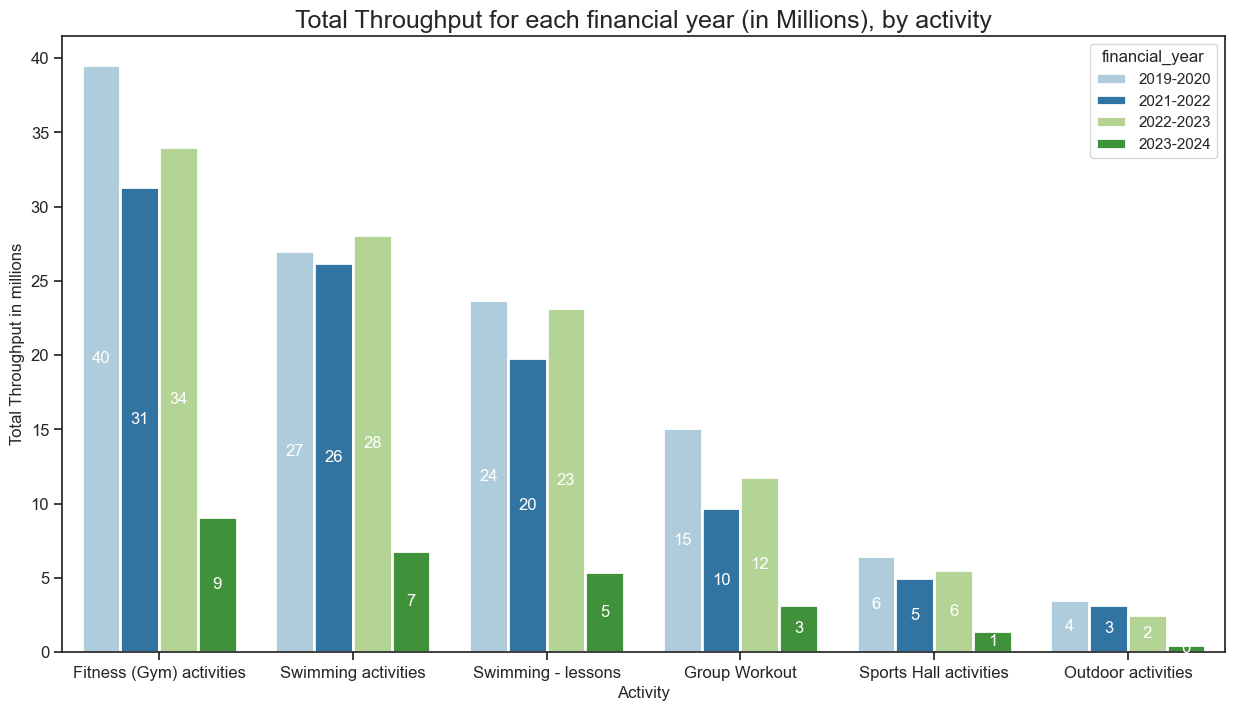

In [258]:
# Set the palette using the name of a palette:
sns.set_palette("Paired")

# Total unique people by financial year, by activity
ax = sns.barplot(y='valueInMills', 
             x='variable', hue='financial_year', linewidth=2,
            data=activity_FY_sorted)
plt.title('Total Throughput for each financial year (in Millions), by activity')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[1], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[2], fmt='%.0f', label_type='center', color='w')
ax.bar_label(ax.containers[3], fmt='%.0f', label_type='center', color='w')
plt.xlabel("Activity")
plt.ylabel("Total Throughput in millions")

Text(0, 0.5, 'Total Unique People in millions')

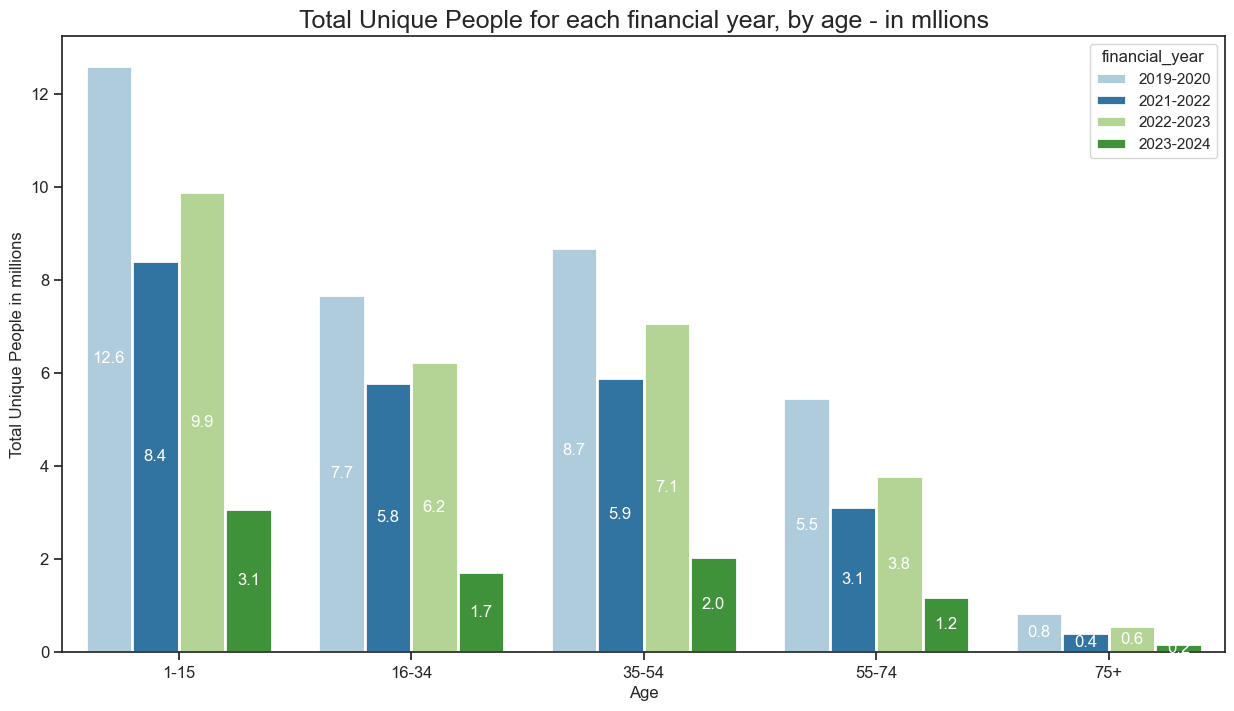

In [260]:
# Set the palette using the name of a palette:
sns.set_palette("Paired")

# Total unique people by financial year, by activity
ax = sns.barplot(y='valueInMills', 
             x='variable', hue='financial_year', linewidth=2,
            data=age_FY)
plt.title('Total Unique People for each financial year, by age - in mllions')
ax.title.set_fontsize(18)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
ax.bar_label(ax.containers[0], fmt='%.1f', label_type='center', color='w')
ax.bar_label(ax.containers[1], fmt='%.1f', label_type='center', color='w')
ax.bar_label(ax.containers[2], fmt='%.1f', label_type='center', color='w')
ax.bar_label(ax.containers[3], fmt='%.1f', label_type='center', color='w')
plt.xlabel("Age")
plt.ylabel("Total Unique People in millions")